In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Get dataset

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range)


The following acoustic properties of each voice are measured and included within the CSV:

$\cdot$mean frequency (in kHz) <br>
$\cdot$sd: standard deviation of frequency<br>
$\cdot$median: median frequency (in kHz)<br>
$\cdot$Q25: first quantile (in kHz)<br>
$\cdot$Q75: third quantile (in kHz)<br>
$\cdot$IQR: interquantile range (in kHz)<br>
$\cdot$skew: skewness (see note in specprop description)<br>
$\cdot$kurt: kurtosis (see note in specprop description)<br>
$\cdot$sp.ent: spectral entropy<br>
$\cdot$sfm: spectral flatness<br>
$\cdot$mode: mode frequency<br>
$\cdot$centroid: frequency centroid (see specprop)<br>
$\cdot$peakf: peak frequency (frequency with highest energy)<br>
$\cdot$meanfun: average of fundamental frequency measured across acoustic signal<br>
$\cdot$minfun: minimum fundamental frequency measured across acoustic signal<br>
$\cdot$maxfun: maximum fundamental frequency measured across acoustic signal<br>
$\cdot$meandom: average of dominant frequency measured across acoustic signal<br>
$\cdot$mindom: minimum of dominant frequency measured across acoustic signal<br>
$\cdot$maxdom: maximum of dominant frequency measured across acoustic signal<br>
$\cdot$dfrange: range of dominant frequency measured across acoustic signal<br>
$\cdot$modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental<br> $\cdot$frequencies divided by the frequency range<br>
$\cdot$label: male or female

In [377]:
df = pd.read_csv('C:/Users/MediaStation/Desktop/Exam/voice.csv')

In [378]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 2. Analyse dataset

In [379]:
print('\u2022 Размерность массива входных данных: \n\n', df.shape)
print('\n\u2022 Список названий столбцов: \n\n', df.columns)
print('\n\u2022 Тип переменных в столбцах:\n\n', df.dtypes)
print('\n\u2022 Проверяем, есть ли незаполненные данные:\n\n', df.isna().any())

• Размерность массива входных данных: 

 (3168, 21)

• Список названий столбцов: 

 Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

• Тип переменных в столбцах:

 meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

• Проверяем, есть ли незаполненные данные:

 meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm

In [476]:
# Кол-во м/ж записей (значения распределились поровну)
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [381]:
# Кол-во уникальных значений для м/ж записей
# Практически все значения уникальный, кроме: minfun, maxfun, mindow, maxdow, dfrange
df.groupby(['label']).nunique()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
label,,,,,,,,,,,,,,,,,,,,,
female,1583,1583,1547,1552,1565,1545,1583,1583,1583,1583,...,1583,1583,676,64,1543,67,771,791,1560,1
male,1583,1583,1562,1557,1532,1535,1583,1583,1583,1583,...,1583,1583,573,116,1503,55,743,748,1528,1


In [479]:
# Все признаки в выборке носят количественный характер, кроме label - категориальный, поэтому далее преобразуем его в бинарный

### 2.1. Preprocessing

In [382]:
# Кодируем пол бинарными значениями, проверяем на транспонированном векторе
df_label_int = pd.DataFrame(data=pd.factorize(df['label'])[0], columns=['label'])
df_label_int.T

,0,1,2,3,4,5,6,7,8,9,...,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167
label,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [383]:
# Удаляем последний столбец, содержащий словесное описание пола
df_except_label = df.drop('label', axis=1)
df_except_label.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [384]:
# Соединяем наши массивы обратно в один 
df_handle = pd.concat([df_except_label, df_label_int], axis=1)
df_handle.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [385]:
# Проверяем последние строки массива, что там признак label = 1 (female)
df_handle.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,1
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,1


### 2.2. Visualization dataset

In [386]:
# print(plt.style.available)
plt.style.use('ggplot')

In [387]:
# Делим выборку на м/ж
mask = df_handle['label'] == 0
male = df_handle[mask]
female = df_handle[~mask]

In [481]:
# Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 1584 записи
#male.info()
#print('\n')
#female.info()

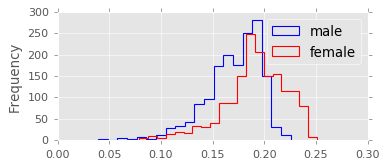

In [462]:
# Большинство признаков выборки имеют слаборазличимую частотность по м/ж как признак meanfreq:
male['meanfreq'].plot.hist(bins=20, label='male', color='blue', histtype='step', linewidth=1, figsize=(5,2))
female['meanfreq'].plot.hist(bins=20, label='female', color='red', histtype='step', linewidth=1, figsize=(5,2))
plt.legend(); plt.draw()

#### Наиболее различимые по м/ж признаки ниже:

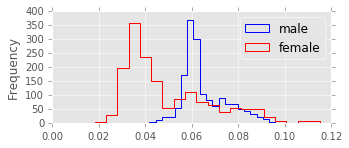

In [506]:
# 1. sd - standart deviation of frequency
male['sd'].plot.hist(bins=20, label='male', color='blue', histtype='step', linewidth=1, figsize=(5,2))
female['sd'].plot.hist(bins=20, label='female', color='red', histtype='step', linewidth=1, figsize=(5,2))
plt.legend(); plt.draw()

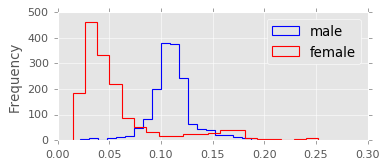

In [467]:
# 2. IQR - interquantile range
male['IQR'].plot.hist(bins=20, label='male', color='blue', histtype='step', linewidth=1, figsize=(5,2))
female['IQR'].plot.hist(bins=20, label='female', color='red', histtype='step', linewidth=1, figsize=(5,2))
plt.legend(); plt.draw()

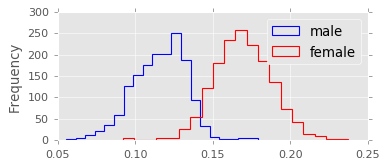

In [468]:
# 3. meanfun - average of fundamental frequency measured across accoustic signal
male['meanfun'].plot.hist(bins=20, label='male', color='blue', histtype='step', linewidth=1, figsize=(5,2))
female['meanfun'].plot.hist(bins=20, label='female', color='red', histtype='step', linewidth=1, figsize=(5,2))
plt.legend(); plt.draw()

In [516]:
# Визуализация scatter plot matrix поможет посмотреть на одной картинке, как связаны между собой различные признаки.
# На диагонали матрицы графиков расположены гистограммы распределений признака (21 х 21)
# Остальные графики — это обычные scatter plots для соответствующих пар признаков
#sns.pairplot(df_handle, hue='label')
#plt.draw()

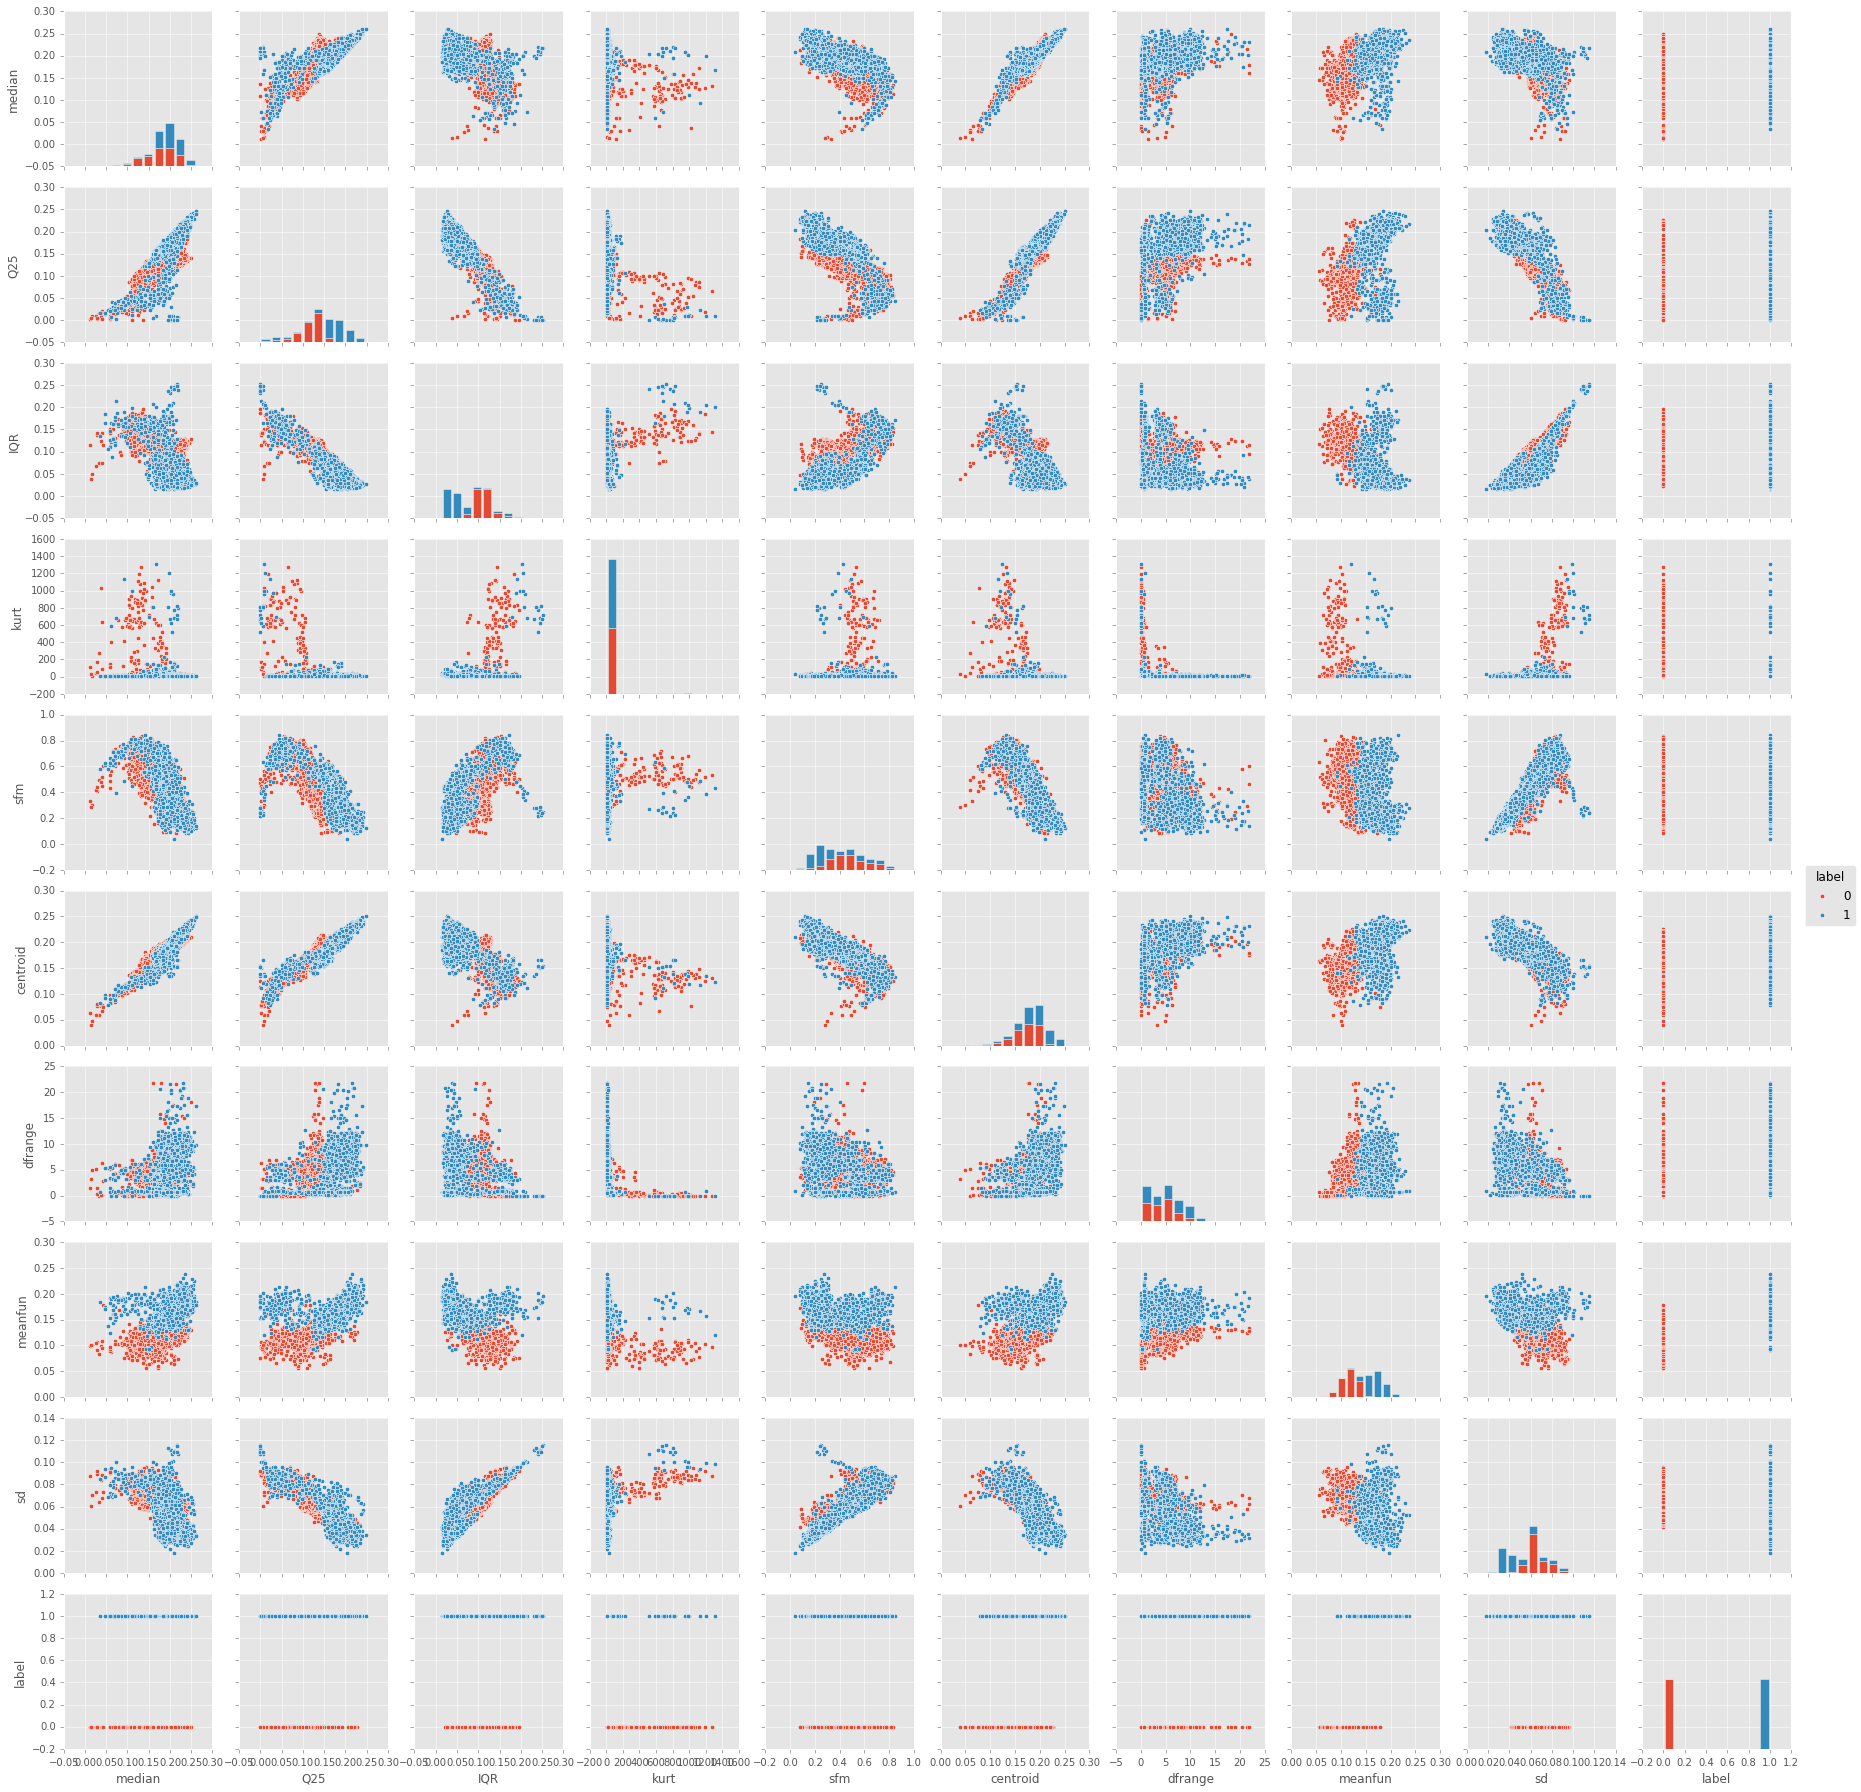

In [519]:
# Более компактно (по наиболее коррелируемым величинам, см. heatmap ниже):
sns.pairplot(df_handle[['median', 'Q25', 'IQR', 'kurt', 'sfm', 'centroid', 'dfrange', 'meanfun', 'sd', 'label']], hue='label')
plt.draw()

#### Посчитаем корреляцию количественных признаков

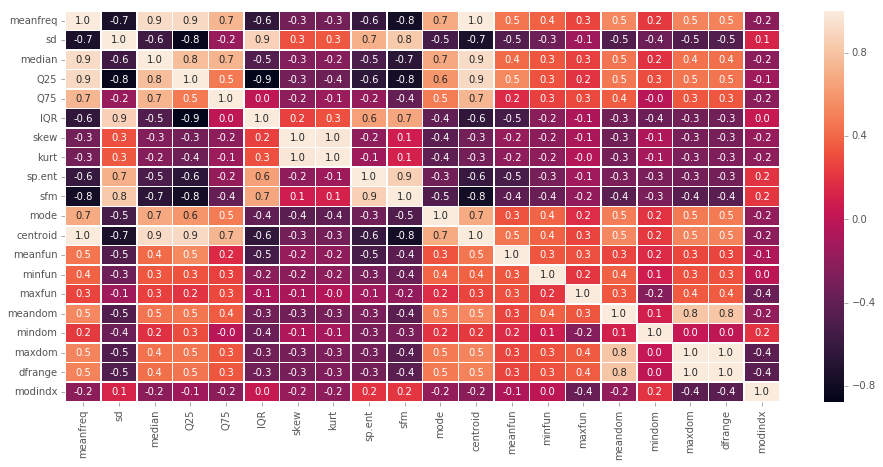

In [499]:
# Чем светлее (ближе к 1) коэффициент корреляции, тем больше зависимость между велечинами
# Коэффициент корреляции между количественными признаками по полу практически не различим (жен. чуть сильнее)
corr_matrix = df_handle.drop(['label'], axis=1).corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.5); plt.draw()

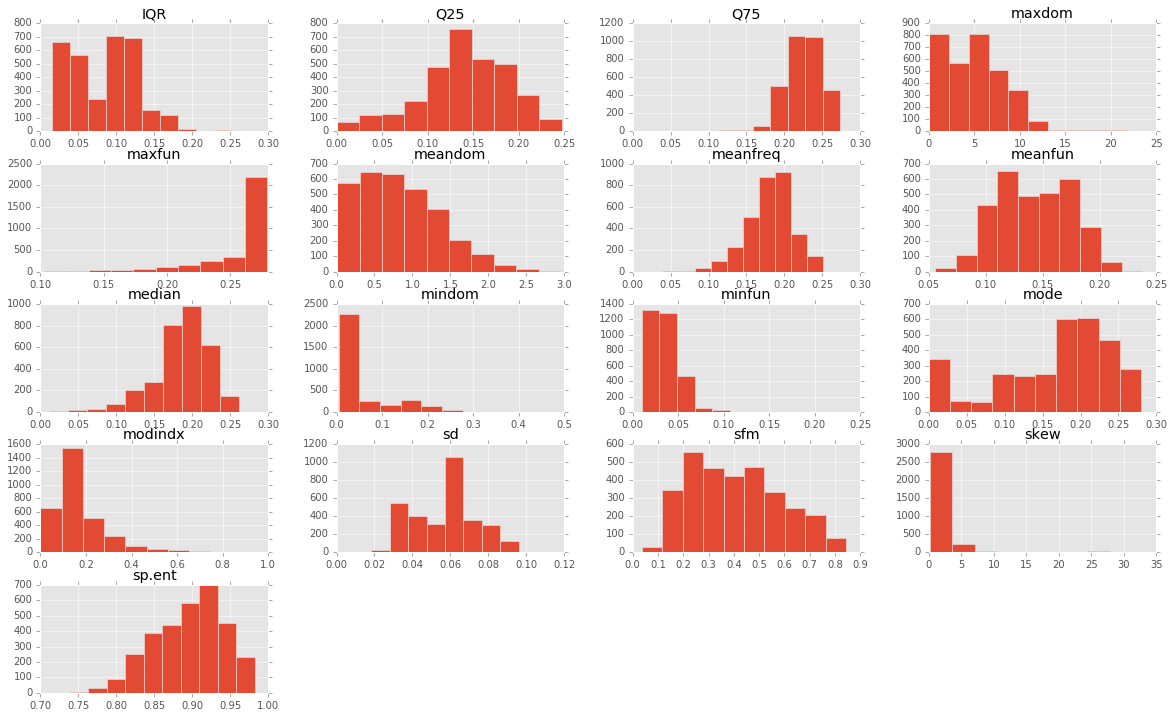

In [501]:
# Наиболее сильно коррелируют между собой: skew/kurt; centroid/meanfreq; dfrange/maxdom
# Поэтому можно оставить для дальнейшего анализа только 3 признака из перечисленных выше с учетом бинарного признака label:
cor_features = list(set(df_handle.columns) - set(['kurt', 'centroid', 'dfrange', 'label']))
df_handle[cor_features].hist(figsize=(20, 12))
plt.draw()

In [520]:
# Как было видно ранее из графиков, признаки maxfun, mindom, minfun, skew можно не рассматривать из-за их "выбросов"
# По нормальному закону распределены: meanfreq, meanfun, median, Q25, Q75, sp.ent. Остальные - ближе к Пуассоновскому.
# Т.к. по половому признаку более различны записи по признакам: meanfun/sd/IQR, - и IQR коррелирует с sd,
# а закон распределения больше похож на нормальный у признака meanfun, то ключевыми признаками будут: meanfun и sd.
# + kurt/skew, т.к. по нему более четко прослеживается граница (см. график sparse_matrix на seaborn, но неоднозначно)

## 3. Build model

In [512]:
# Разбиваем данные на обучающую и тестовую выборки (перемешивая, т.к. они отсортированы по целевой функции label)
